In [ ]:
#importing libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd 
from google.colab import files

In [ ]:
#creating a dictionary to store colleges for men's volleyball
mens_volleyball = {'City College of New York mens volleyball' : 'https://ccnyathletics.com/sports/mens-volleyball/roster',
'Lehman College mens volleyball' : 'https://lehmanathletics.com/sports/mens-volleyball/roster',
'Brooklyn College mens volleyball' : 'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster',
'John Jay College mens volleyball' : 'https://johnjayathletics.com/sports/mens-volleyball/roster',
'Baruch College mens volleyball' : 'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster',
'Medgar Evans College mens volleyball' : 'https://mecathletics.com/sports/mens-volleyball/roster',
'Hunter College mens volleyball' : 'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster',
'York College mens volleyball' : 'https://yorkathletics.com/sports/mens-volleyball/roster',
'Ball State mens volleyball' : 'https://ballstatesports.com/sports/mens-volleyball/roster',
'Lewis University mens volleyball' : 'https://lewisflyers.com/sports/mens-volleyball/roster'}

#creating a dictionary to store colleges for women's volleyball
womens_volleyball = {'BMCC womens volleyball' : 'https://bmccathletics.com/sports/womens-volleyball/roster',
'York College womens volleyball' : 'https://yorkathletics.com/sports/womens-volleyball/roster',
'Hostos CC womens volleyball' : 'https://hostosathletics.com/sports/womens-volleyball/roster',
'Bronx CC womens volleyball' : 'https://bronxbroncos.com/sports/womens-volleyball/roster/2021',
'Queens College womens volleyball' : 'https://queensknights.com/sports/womens-volleyball/roster',
'Augusta College womens volleyball' : 'https://augustajags.com/sports/wvball/roster',
'Flagler College womens volleyball' : 'https://flaglerathletics.com/sports/womens-volleyball/roster',
'Young Harris College womens volleyball' : 'https://yhcathletics.com/sports/womens-volleyball/roster',
'USC Aiken womens volleyball' : 'https://pacersports.com/sports/womens-volleyball/roster',
'Penn State - Lock Haven womens volleyball' : 'https://www.golhu.com/sports/womens-volleyball/roster'}

#creating a dictionary to store colleges for men's swimming
mens_swimming = {'College of Staten Island mens swimming' : 'https://csidolphins.com/sports/mens-swimming-and-diving/roster',
'York College mens swimming' : 'https://yorkathletics.com/sports/mens-swimming-and-diving/roster',
'Baruch College mens swimming' : 'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster',
'Brooklyn College mens swimming' : 'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster',
'Lindenwood University mens swimming' : 'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster',
'Mckendree University mens swimming' : 'https://mckbearcats.com/sports/mens-swimming-and-diving/roster',
'Ramapo College mens swimming' : 'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster',
'SUNY Oneota mens swimming' : 'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster',
'SUNY Binghampton mens swimming' : 'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22',
'Albright College mens swimming' : 'https://albrightathletics.com/sports/mens-swimming-and-diving/roster'}

#creating a dictionary to store colleges for women's swimming
womens_swimming = {'College of Staten Island womens swimming' : 'https://csidolphins.com/sports/womens-swimming-and-diving/roster',
'Queens College womens swimming' : 'https://queensknights.com/sports/womens-swimming-and-diving/roster',
'York College womens swimming' : 'https://yorkathletics.com/sports/womens-swimming-and-diving/roster',
'Baruch College womens swimming' : 'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim',
'Brooklyn College womens swimming' : 'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster',
'Lindenwood University womens swimming' : 'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster',
'Mckendree University womens swimming' : 'https://mckbearcats.com/sports/womens-swimming-and-diving/roster',
'Ramapo College womens swimming' : 'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster',
'Kean University womens swimming' : 'https://keanathletics.com/sports/womens-swimming-and-diving/roster',
'SUNY Oneota womens swimming' : 'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster'}



In [ ]:
#creating a list to store the dictionaries in
sportsteam = [{'mens_volleyball':mens_volleyball}, {'womens_volleyball':womens_volleyball}, {'mens_swimming':mens_swimming}, {'womens_swimming':womens_swimming}]

In [ ]:
def scrape(volleyswim,volleyswim_file): # scraping the websites
  height = [] # created an empty list named height to later collect heights for assignment
  name = [] # created an empty list named name to later collect names for assignment
  for team, url in volleyswim.items(): # for looping through each URL 
    page = requests.get(url) #requesting info from server
    soup = BeautifulSoup(page.content,'html.parser') #parsing through the info
    all_relevant_name = soup.find_all('td', class_='sidearm-table-player-name') # obtaining player names from specified td class 
    all_relevant_height = soup.find_all('td', class_='height') # obtaining height of players from specified td class
    for h in all_relevant_height: # for looping in the all_relevant_height dataset 
      if h.get_text() == '-': #adding the "-" to empty heights in the height list
        height.append('-')
      else:
        x=h.get_text().split('-') # variable x is defined to hold height value, h will get text which gets split. Split will convert it to a list that split the feet 
                                # from the inches using the dash symbol
        height.append(int(x[0])*12+int(x[1])) #appending the x variable value into the height list created earlier mathematics applied to make it inches for legibility

    total = 0 #setting the total to 0
    for a in range(0, len(height)): #for looping to add any height without a "-" to the total
          if height[a] != '-': 
            total += height[a] 
    height_average = total / len (height) #finding average height of players by dividing total with the amount of heights
    for x in range(0, len(height)): #for looping to set the empty heights, "-", equal to the average height
          if height[x] == '-':
            height[x] = height_average

    for n in all_relevant_name: # for looping in the all_relevant_name dataset to get rid of leading and trailing spaces and adding it to the name list
      name.append(n.get_text().strip())
  height_average = total / len (height) #finding total average height of all players by dividing total with the amount of heights
  print('height average:',height_average) #printing average heights
  filename = volleyswim_file + '.csv' #setting the file name 
  df = pd.DataFrame() #creating a dataframe 
  df['name'] = name #adding name to dataframe
  df['heights'] = height #adding height to dataframe
  print(df) #printing dataframe
  tallest=(df.sort_values(by='heights',ascending=False)) #sorting the players by height
  print('tallest 5:\n',tallest.head(5),'\n shortest 5:\n', tallest.tail(5).sort_values('heights',ascending=True)) #printing the 5 tallest and 5 shortest players of each team
  df.to_csv(filename, index=False) #converting the dataframe into a csv file
  files.download(filename) #downloading the csv files
  return height_average #returning the average heights of players

In [ ]:
averages=[] #creating an empty list for averages
names=[] #creating an empty list for names
for team in sportsteam: #for looping the list of dictionaries
 for name, dictionary in team.items(): #inner for looping for each dictionary
   print('=====================================',name,'=====================================') #formatting by sports name
   averages.append(scrape(dictionary, name)) #adding the average of each dictionary to averages list
   names.append(name) #adding the name of each dictionary to names list
print(averages) #print the averages list
average_player_height = pd.DataFrame(
    {'sport': names,'average':averages}
) #creating a dataframe to display the names and averages of each team


===================================== mens_volleyball =====================================
height average: 73.03787878787878
                     name  heights
0           Jeffrey Celis       69
1              Reng  Chen       69
2    Edwin Fierros Gaytan       68
3      Fred  De La Cuadra       70
4            Utpal  Chand       69
..                    ...      ...
127       Carter Burzlaff       79
128     Chase Celichowski       78
129            John Davis       77
130      Christian Prayer       76
131        Carlos Jimenez       73

[132 rows x 2 columns]
tallest 5:
                name  heights
117   Tyler Mitchem       83
111   Tyler Simpson       82
100  Mark Wickstrom       81
116     Isaac Benka       81
125    Michael Sack       81 
 shortest 5:
              name  heights
11     Juan Lemus       63
35  Bryce Glasper       64
67      Bryan Eng       66
69    Andrew Reza       66
23   Darren Roach       66
===================================== womens_volleyball ===========

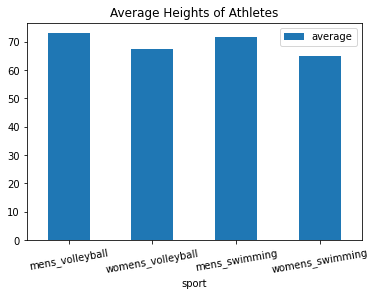

In [ ]:
average_player_height.plot.bar(x ='sport', y = 'average', rot= 10, title ='Average Heights of Athletes') #creating a bar graph for the averages